# Prototype: Alpha

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `800`|
| *Adversarial Attack* | `CW` |
| *Explanations* | `SHAP` |


---

In [1]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [2]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 400 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Wednesday-workingHours.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting

In [3]:
feature_df_all, label_df_all, _ = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, random_sample_state=42)
print(feature_df_all.shape, label_df_all.shape)

-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
(2399345, 70) (2399345, 2)


## Split Data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df_all, label_df_all, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1919476, 70) (479869, 70) (1919476, 2) (479869, 2)


## Create IDS

In [5]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# build ids with complete dataset
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)

2025-03-10 15:45:08.810786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741617908.824700  104057 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741617908.828383  104057 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 15:45:08.844858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-10 15:45:10.687670: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

Epoch 1/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9945 - loss: 0.0203 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 2/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0022
Epoch 3/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 4/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 5/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9989 - val_loss: 0.0061
Epoch 6/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 7/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 8/10
15356/15356 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

## Generate Attacks

In [6]:
import functions.attack_generator as ag
import importlib
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# create smaller dataset
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# import numpy as np
# target_label = np.zeros_like(y_train)
# target_label[:, 0] = 1 # desired predicted label = [1, 0] = BENIGN
# print(target_label[:3])

X_adv = ag.generate_cw_attacks_parallel(art_model, X_train, num_cores=12)
# print(X_adv_fgsm.iloc[:, :3].head(2))

y_pred_adv = ag.evaluate_art_model(art_model, X_adv, y_train)

(640, 70) (160, 70) (640, 2) (160, 2)
Running attack using 12 CPU cores...

Process 106933 is generating adversarial examples for batch of size 53 
Process 106934 is generating adversarial examples for batch of size 53 
Process 106935 is generating adversarial examples for batch of size 53 
Process 106937 is generating adversarial examples for batch of size 53 
Process 106936 is generating adversarial examples for batch of size 53 
Process 106938 is generating adversarial examples for batch of size 53 
Process 106939 is generating adversarial examples for batch of size 53 
Process 106941 is generating adversarial examples for batch of size 53 
Process 106940 is generating adversarial examples for batch of size 53 

Process 106942 is generating adversarial examples for batch of size 53 

Process 106943 is generating adversarial examples for batch of size 53 
Process 106944 is generating adversarial examples for batch of size 57 












C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/53 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/57 [00:00<?, ?it/s]

Accuracy: 92.50%
              precision    recall  f1-score   support

      BENIGN       0.88      0.98      0.93       320
      ATTACK       0.98      0.87      0.92       320

   micro avg       0.93      0.93      0.93       640
   macro avg       0.93      0.93      0.92       640
weighted avg       0.93      0.93      0.92       640
 samples avg       0.93      0.93      0.93       640

Confusion Matrix: Positive == BENIGN
TN: 279, FP: 41, FN: 7, TP: 313


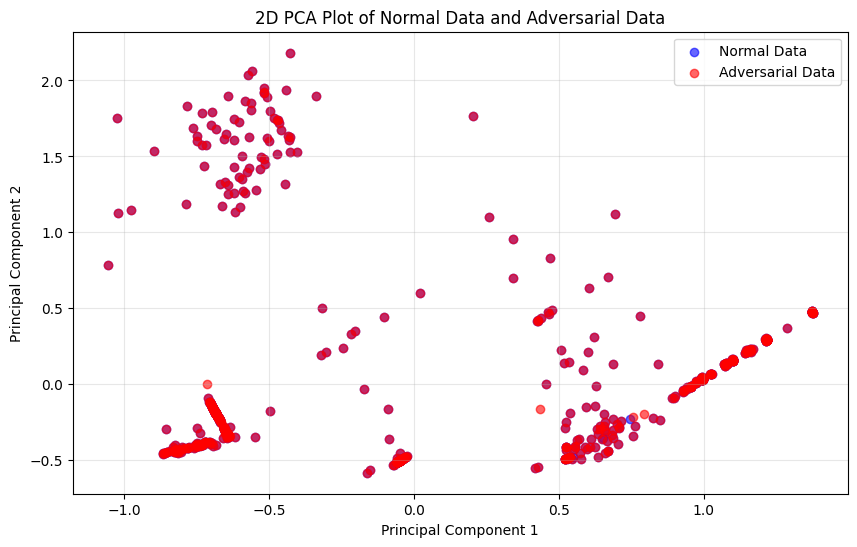

In [7]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train, 'Normal Data', X_adv, 'Adversarial Data')

## Explainer

In [8]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values, shap_values_df = exp.generate_shap_values(explainer, X_train)
print(shap_values_df.shape)

shap_values_adv, shap_values_adv_df = exp.generate_shap_values(explainer, X_adv)
print(shap_values_adv_df.shape)

PermutationExplainer explainer: 641it [00:48, 11.36it/s]                         


(640, 70)


PermutationExplainer explainer: 641it [00:45, 11.34it/s]                         

(640, 70)


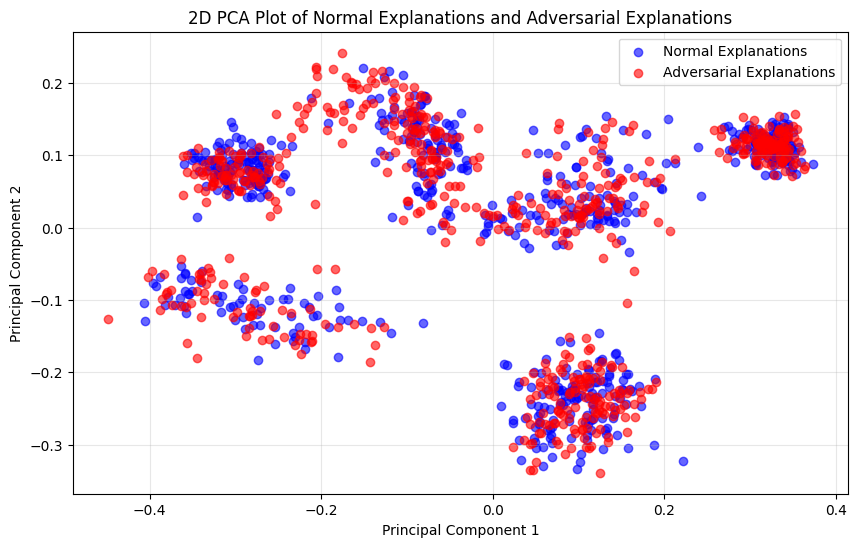

In [9]:
visualizer.visualize_data_distribution(shap_values_df, 'Normal Explanations', shap_values_adv_df, 'Adversarial Explanations')

## Detector

In [16]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
X, y = det.build_train_datasets(shap_values_df, shap_values_adv_df)
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(1280, 70) (1280, 2)
(1152, 70) (128, 70) (1152, 2) (128, 2)
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4782 - loss: 0.6933 - val_accuracy: 0.4632 - val_loss: 0.6936
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5210 - loss: 0.6929 - val_accuracy: 0.4762 - val_loss: 0.6938
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5059 - loss: 0.6929 - val_accuracy: 0.4762 - val_loss: 0.6939
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5058 - loss: 0.6928 - val_accuracy: 0.4762 - val_loss: 0.6940
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5092 - loss: 0.6925 - val_accuracy: 0.4762 - val_loss: 0.6942
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5118 - loss: 0.6924 - val_accuracy: 0.4762 - val_loss: 0.6943
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5276 - loss: 0.6921 - val_accuracy: 0.4762 - val_loss: 0.6944
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc

### Comparator - Normal Detector: Based on Raw Data

In [17]:
X, y = det.build_train_datasets(X_train, X_adv)
print(X.shape, y.shape)

X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(1280, 70) (1280, 2)
(1152, 70) (128, 70) (1152, 2) (128, 2)
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4837 - loss: 0.7098 - val_accuracy: 0.4762 - val_loss: 0.6959
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4690 - loss: 0.6966 - val_accuracy: 0.4762 - val_loss: 0.6952
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5154 - loss: 0.6943 - val_accuracy: 0.4762 - val_loss: 0.6945
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5180 - loss: 0.6929 - val_accuracy: 0.4762 - val_loss: 0.6951
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5059 - loss: 0.6953 - val_accuracy: 0.4762 - val_loss: 0.6946
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4998 - loss: 0.6937 - val_accuracy: 0.4762 - val_loss: 0.6949
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5143 - loss: 0.6942 - val_accuracy: 0.4762 - val_loss: 0.6953
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc

---
## Test Process

In [53]:
print(X_test.shape)

(800, 70)


### Generate Attacks

In [54]:
X_test_adv = ag.generate_fgsm_attacks(art_model, X_test)

Adversarial FGSM examples generated. Shape: (800, 70)


### Generate Explanations

In [55]:
X_test_adv_shap_values, X_test_adv_shap_values_df = exp.generate_shap_values(explainer, X_test_adv)
X_test_shap_values, X_test_shap_values_df = exp.generate_shap_values(explainer, X_test)

PermutationExplainer explainer: 801it [00:49, 12.77it/s]                         
PermutationExplainer explainer: 801it [00:53, 12.15it/s]                         


### Generate Datasets

In [56]:
X, y = det.build_train_datasets(X_test_shap_values_df, X_test_adv_shap_values_df)

### Preprocess Data

In [57]:
# print(np.max(X))
# print(np.min(X))
# X = normalizer.transform(X)
# print(np.max(X))
# print(np.min(X))

### Shuffle Data & Predict

In [58]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=187)

y_pred = detector.predict(X)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


### Evaluate

In [59]:
det.evaluate_model(y_pred, y)

Global Accuracy: 99.69%
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00       800
 ADVERSARIAL       1.00      1.00      1.00       800

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

True Negative Rate: 99.62%
False Positive Rate: 0.38%
True Positive Rate: 99.75%
False Negative Rate: 0.25%


---
## Additional Evaluation - New Samples

In [60]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

X_eval, y_eval = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=500, random_sample_state=17)
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (1000, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
BENIGN  ATTACK
False   True      500
True    False     500
Name: count, dtype: int64


In [61]:
X_adv_fgsm_eval = ag.generate_fgsm_attacks(art_model, X_eval)
print(X_adv_fgsm.iloc[:, :3].head(2))

ag.evaluate_art_model(art_model, X_adv_fgsm_eval, y_eval)

Adversarial FGSM examples generated. Shape: (1000, 70)
   Destination Port  Flow Duration  Total Fwd Packets
0          0.101221            0.0           0.100018
1          0.000000            0.0           0.000000
Accuracy: 0.177
              precision    recall  f1-score   support

      BENIGN       0.22      0.25      0.24       500
      ATTACK       0.12      0.10      0.11       500

   micro avg       0.18      0.18      0.18      1000
   macro avg       0.17      0.18      0.17      1000
weighted avg       0.17      0.18      0.17      1000
 samples avg       0.18      0.18      0.18      1000

Confusion Matrix: Positive == BENIGN
TN: 50, FP: 450, FN: 373, TP: 127


0.177

In [62]:
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_fgsm_eval)
X_eval_shap_values, X_eval_shap_values_df = exp.generate_shap_values(explainer, X_eval)

PermutationExplainer explainer: 1001it [00:57, 14.61it/s]                          
PermutationExplainer explainer: 1001it [01:03, 13.27it/s]                          


In [63]:
X_eval_detector, y_eval_detector = det.build_train_datasets(X_eval_shap_values_df, X_eval_adv_shap_values_df)
print(X_eval_detector.shape, y_eval_detector.shape)

(2000, 70) (2000, 2)


In [64]:
from sklearn.utils import shuffle

X_eval_detector, y_eval_detector = shuffle(X_eval_detector, y_eval_detector, random_state=187)

y_pred_eval_detector = detector.predict(X_eval_detector)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [65]:
det.evaluate_model(y_pred_eval_detector, y_eval_detector)

Global Accuracy: 99.60%
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1000
 ADVERSARIAL       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

True Negative Rate: 99.60%
False Positive Rate: 0.40%
True Positive Rate: 99.60%
False Negative Rate: 0.40%
